In [1]:
import detectron2

In [2]:
from detectron2.utils.logger import setup_logger
setup_logger()

<Logger detectron2 (DEBUG)>

In [4]:
%matplotlib inline
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.structures import BoxMode

In [5]:
import numpy as np
import os, json, cv2, random
import matplotlib.pyplot as plt

In [12]:
cfg = get_cfg()
cfg.MODEL.DEVICE='cpu'
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_1x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5 
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_1x.yaml")

In [11]:
cfg.MODEL.DEVICE

'cuda'

In [13]:
predictor = DefaultPredictor(cfg)

[04/14 08:36:22 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_1x/137260431/model_final_a54504.pkl ...


model_final_a54504.pkl: 178MB [00:24, 7.14MB/s]                                                                        


In [23]:
path = "E:/Experiments/Datasets/COCO/val2017/val2017/"
files = os.listdir(path)

In [24]:
len(files)

5000

In [25]:
path+files[0]

'E:/Experiments/Datasets/COCO/val2017/val2017/000000000139.jpg'

(426, 640, 3)


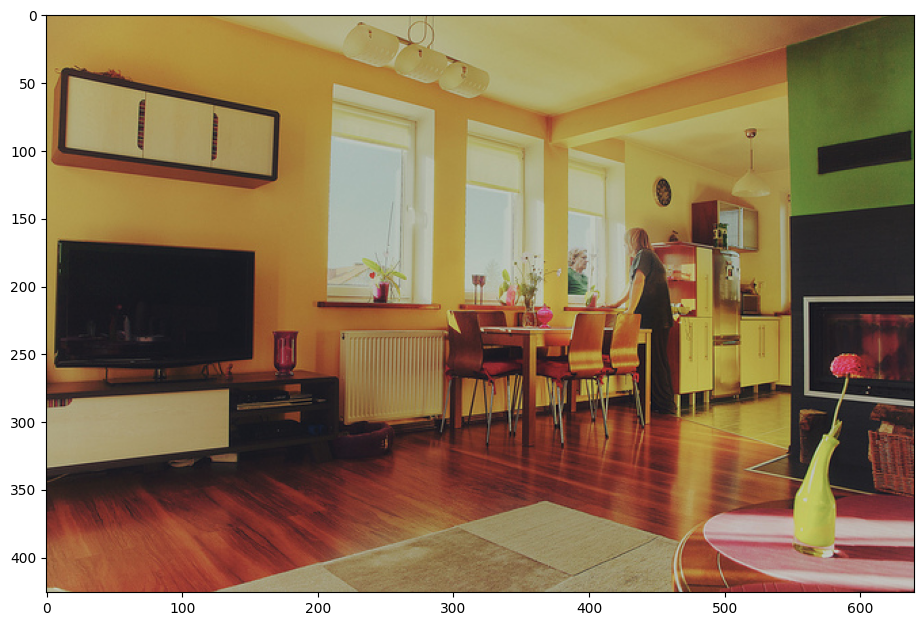

In [26]:
#!wget http://images.cocodataset.org/val2017/000000439715.jpg -O input.jpg ==> Linux
im = cv2.imread(path+files[0])
print(im.shape)
plt.figure(figsize=(15,7.5))
plt.imshow(im[..., ::-1])

In [27]:
outputs = predictor(im[..., ::-1])

C:\Users\user\anaconda3\envs\detectron_env\Lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


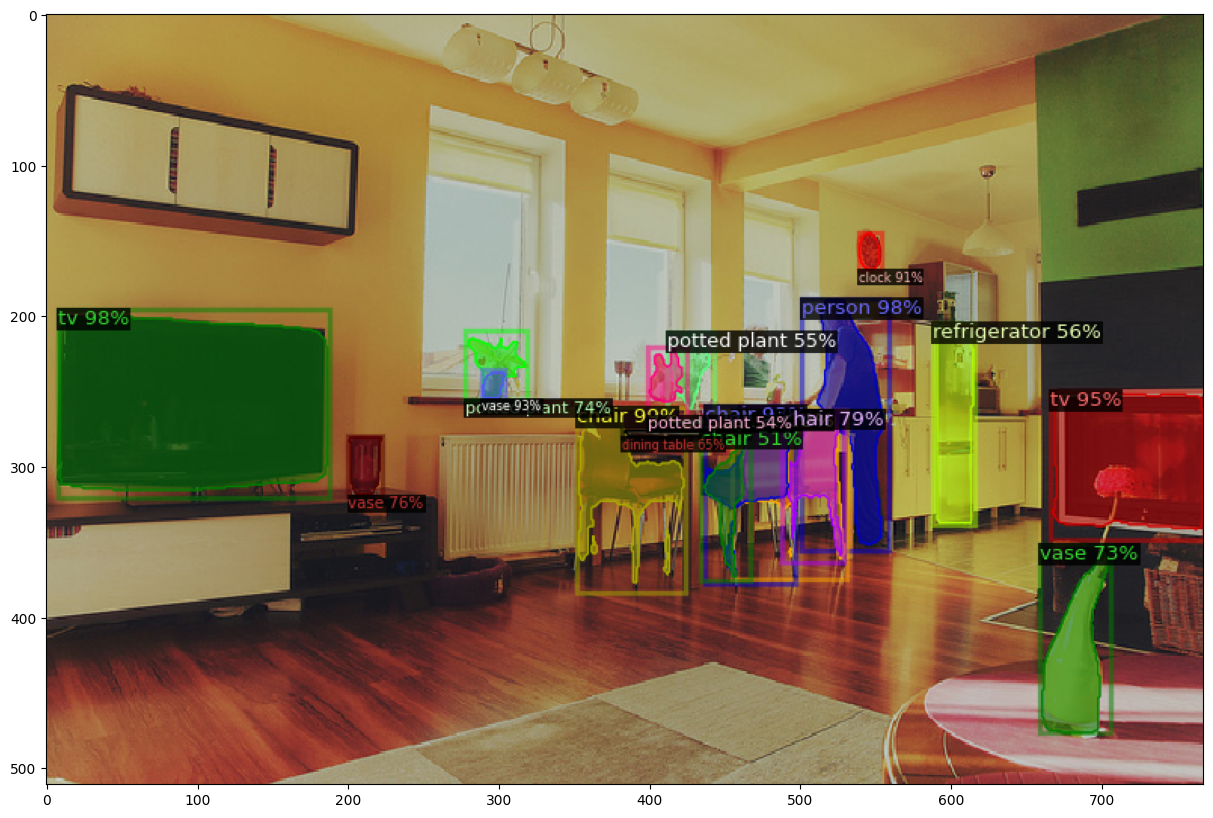

In [28]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize=(20,10))
plt.imshow(out.get_image()[..., ::-1][..., ::-1])

In [38]:
outputs['instances'].get_fields().keys()

dict_keys(['pred_boxes', 'scores', 'pred_classes', 'pred_masks'])

In [42]:
outputs['instances'].get('pred_classes')

tensor([56,  0, 62, 62, 56, 56, 75, 74, 56, 75, 58, 75, 60, 72, 58, 58, 56])

In [49]:
predictor.metadata.as_dict()

{'name': 'coco_2017_val',
 'json_file': 'datasets\\coco/annotations/instances_val2017.json',
 'image_root': 'datasets\\coco/val2017',
 'evaluator_type': 'coco',
 'thing_dataset_id_to_contiguous_id': {1: 0,
  2: 1,
  3: 2,
  4: 3,
  5: 4,
  6: 5,
  7: 6,
  8: 7,
  9: 8,
  10: 9,
  11: 10,
  13: 11,
  14: 12,
  15: 13,
  16: 14,
  17: 15,
  18: 16,
  19: 17,
  20: 18,
  21: 19,
  22: 20,
  23: 21,
  24: 22,
  25: 23,
  27: 24,
  28: 25,
  31: 26,
  32: 27,
  33: 28,
  34: 29,
  35: 30,
  36: 31,
  37: 32,
  38: 33,
  39: 34,
  40: 35,
  41: 36,
  42: 37,
  43: 38,
  44: 39,
  46: 40,
  47: 41,
  48: 42,
  49: 43,
  50: 44,
  51: 45,
  52: 46,
  53: 47,
  54: 48,
  55: 49,
  56: 50,
  57: 51,
  58: 52,
  59: 53,
  60: 54,
  61: 55,
  62: 56,
  63: 57,
  64: 58,
  65: 59,
  67: 60,
  70: 61,
  72: 62,
  73: 63,
  74: 64,
  75: 65,
  76: 66,
  77: 67,
  78: 68,
  79: 69,
  80: 70,
  81: 71,
  82: 72,
  84: 73,
  85: 74,
  86: 75,
  87: 76,
  88: 77,
  89: 78,
  90: 79},
 'thing_classes': ['

In [54]:
savepath = "E:/Experiments/Datasets/COCO/object_detection/"
out.save(savepath+filename)

In [57]:
for i in range(50):
    im = cv2.imread(path+files[i])
    outputs = predictor(im[..., ::-1])
    v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))   
    out.save(savepath+files[i])